In [11]:
# Imports

import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")
conn = sqlite3.connect("imdb.db")

## Qual o número de Filmes avaliados por gênero em relação ao ano de estréia?

In [12]:
consulta = "SELECT genres FROM titles"
resultado = pd.read_sql_query(consulta,conn)
resultado.head()

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"


In [13]:
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [14]:
generos_unicos = retorna_generos(resultado)

In [15]:
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [16]:
genero_count=[]
for item in generos_unicos:
    consulta="SELECT COUNT(*) COUNT FROM titles WHERE genres LIKE" + '\'' + '%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta,conn)
    genero_count.append(resultado['COUNT'].values[0])


In [20]:
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [21]:
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values


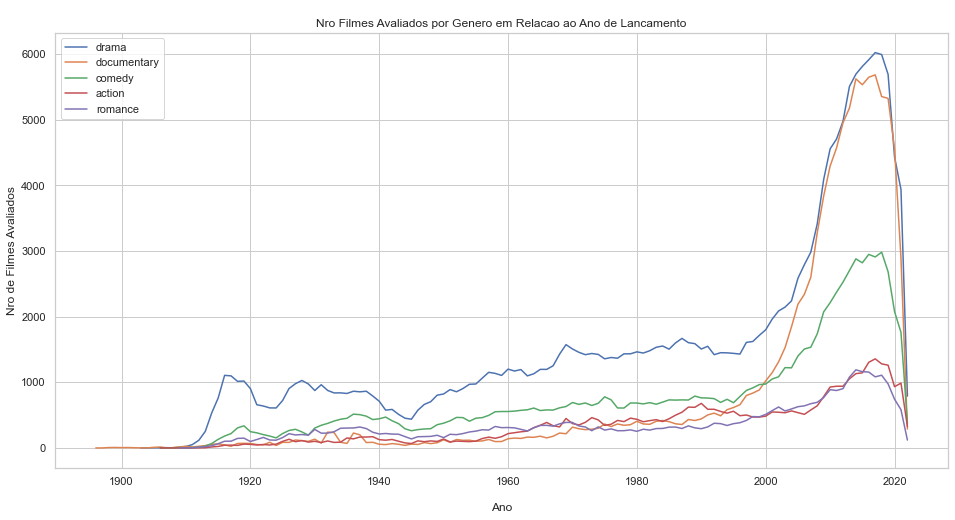

In [23]:
plt.figure(figsize=(16,8))

for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta,conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Nro de Filmes Avaliados')
plt.title('\nNro Filmes Avaliados por Genero em Relacao ao Ano de Lancamento')
plt.legend(labels = top_generos)
plt.show()
